In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

current_dir = os.path.abspath(os.getcwd())
parent_dir = os.path.dirname(current_dir)
sys.path.append(os.path.join(parent_dir, 'scripts'))
import visualisation

# Milestone 1

In [23]:
data_1=pd.read_csv('../data/derivatives/dataframe.csv')

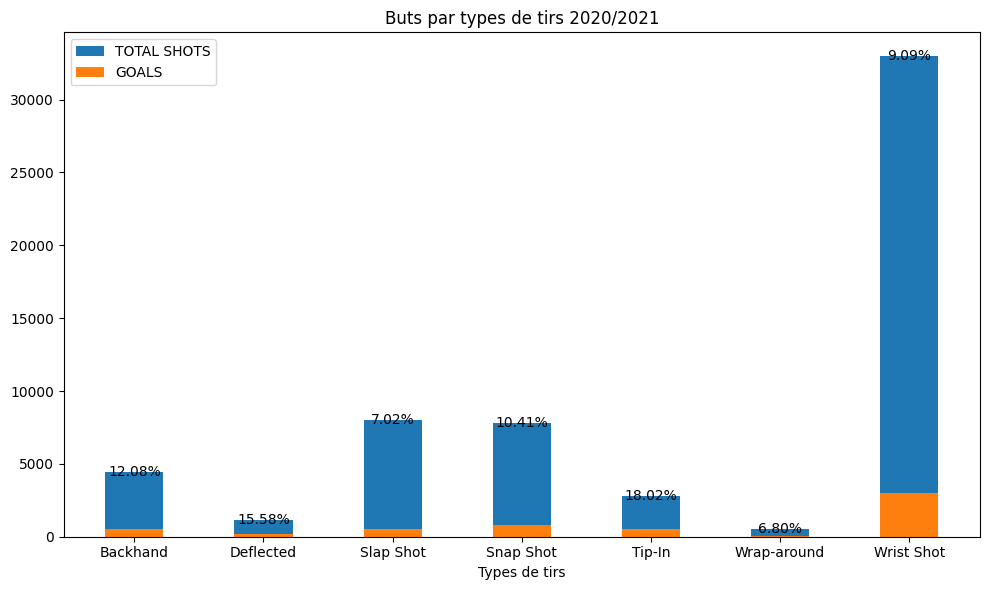

In [7]:
visualisation.shots_goals(data_1, 2020, log=False)

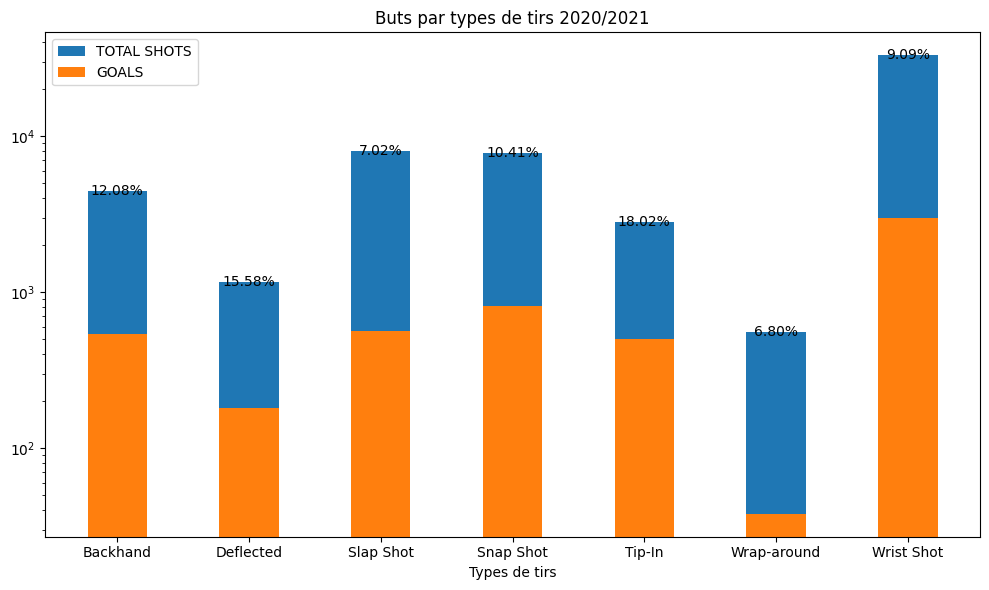

In [8]:
visualisation.shots_goals(data_1, 2020, log=True)

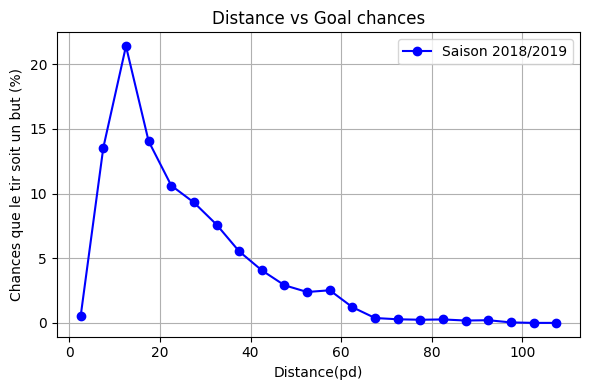

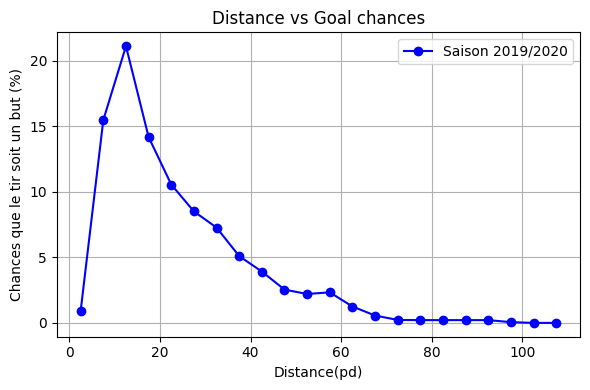

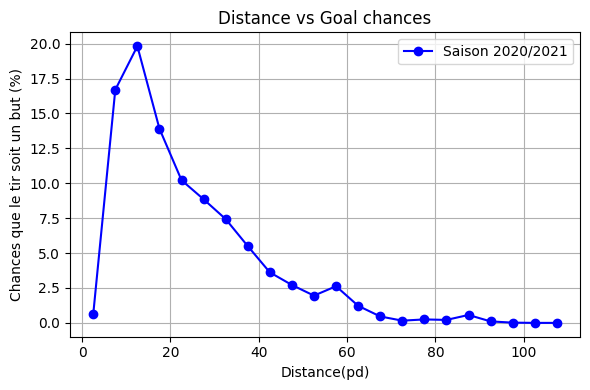

In [9]:
visualisation.Distance_goals(data_1, 2018)
visualisation.Distance_goals(data_1, 2019)
visualisation.Distance_goals(data_1, 2020)

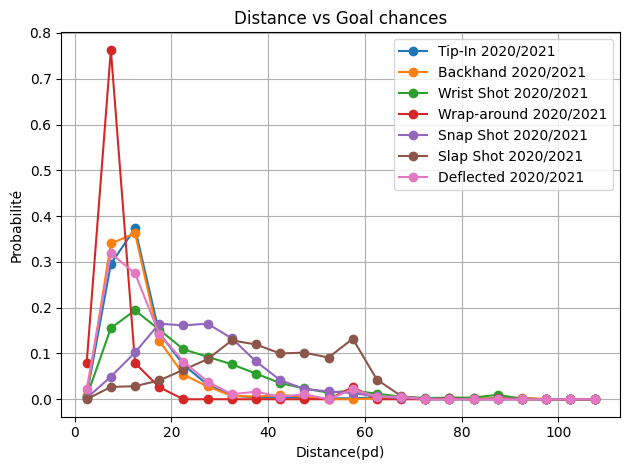

In [10]:
visualisation.Distance_goals_shots(data_1, 2020)

## dt contient tout les coordonnées ramenées à la zone offensive

In [26]:
data_2 = visualisation.Offensive_coords(data_1)

In [45]:
np.rad2deg(np.arctan(3/10))

16.69924423399362

In [40]:
x_goal, y_goal = 89, 0
# Calculer l'angle entre le tir et le filet
angle = np.arctan((y_goal - data_2['coord_y'])/(x_goal - np.abs(data_2['coord_x'])))
angle_new = np.arctan((y_goal - data_2['new_y'])/(x_goal - data_2['new_x']))
# Convertir l'angle en degrés
angle_new = np.rad2deg(angle_new)
angle = np.rad2deg(angle)

In [43]:
data_2

,gameId,evt_idx,prd,prdTime,team,goalFlag,shotCategory,coord_x,coord_y,shotBy,goalieName,noGoalie,teamStrength,visitorTeam,hostTeam,homeRinkSide,awayRinkSide,new_x,new_y
0,2020030223,11,1,02:20,Carolina Hurricanes,False,Tip-In,-79.0,-3.0,Morgan Geekie,Andrei Vasilevskiy,False,NaN,Carolina Hurricanes,Tampa Bay Lightning,left,right,11.0,3.0
1,2020030223,12,1,02:31,Carolina Hurricanes,False,Backhand,-80.0,6.0,Steven Lorentz,Andrei Vasilevskiy,False,NaN,Carolina Hurricanes,Tampa Bay Lightning,left,right,10.0,-6.0
2,2020030223,17,1,05:18,Tampa Bay Lightning,False,Wrist Shot,78.0,23.0,Victor Hedman,Petr Mrazek,False,NaN,Carolina Hurricanes,Tampa Bay Lightning,left,right,12.0,23.0
3,2020030223,26,1,06:17,Tampa Bay Lightning,False,Wrist Shot,1.0,-35.0,Barclay Goodrow,Petr Mrazek,False,NaN,Carolina Hurricanes,Tampa Bay Lightning,left,right,89.0,-35.0
4,2020030223,30,1,06:52,Tampa Bay Lightning,False,Wrist Shot,65.0,5.0,Victor Hedman,Petr Mrazek,False,NaN,Carolina Hurricanes,Tampa Bay Lightning,left,right,25.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382153,2018020890,306,3,19:17,Minnesota Wild,False,Wrist Shot,-52.0,-22.0,Zach Parise,Cory Schneider,False,NaN,New Jersey Devils,Minnesota Wild,right,left,38.0,22.0
382154,2018020890,316,4,01:36,Minnesota Wild,False,Wrist Shot,49.0,-26.0,Jason Zucker,Cory Schneider,False,NaN,New Jersey Devils,Minnesota Wild,right,left,41.0,-26.0
382155,2018020890,322,4,02:41,Minnesota Wild,False,Wrist Shot,63.0,2.0,Charlie Coyle,Cory Schneider,False,NaN,New Jersey Devils,Minnesota Wild,right,left,27.0,2.0
382156,2018020890,323,4,02:50,Minnesota Wild,False,Wrist Shot,74.0,3.0,Jared Spurgeon,Cory Schneider,False,NaN,New Jersey Devils,Minnesota Wild,right,left,16.0,3.0


In [42]:
angle

0         16.699244
1        -33.690068
2        -64.440035
3         21.689065
4        -11.768289
            ...    
382153    30.735488
382154    33.023868
382155    -4.398705
382156   -11.309932
382157    37.874984
Length: 382158, dtype: float64

In [41]:
angle_new

0         -2.202598
1          4.343240
2        -16.630954
3         90.000000
4         -4.467159
            ...    
382153   -23.334041
382154    28.442929
382155    -1.847610
382156    -2.353297
382157    -5.063617
Length: 382158, dtype: float64

## les lignes contenant les valeurs aberrantes :

In [12]:
dt_f=data_2[data_2['new_x']>=0]

## Taux de tir moyen par heure de la ligue par emplacement

In [13]:
Ligue = visualisation.Taux_ligue(dt_f, 2020)

In [14]:
team = visualisation.Taux_team(dt_f, 'Colorado Avalanche', 2020)
result = []

for i in range(len(team)):
    sublist_result = [team[i][j] - Ligue[i][j] for j in range(len(team[i]))]
    result.append(sublist_result)

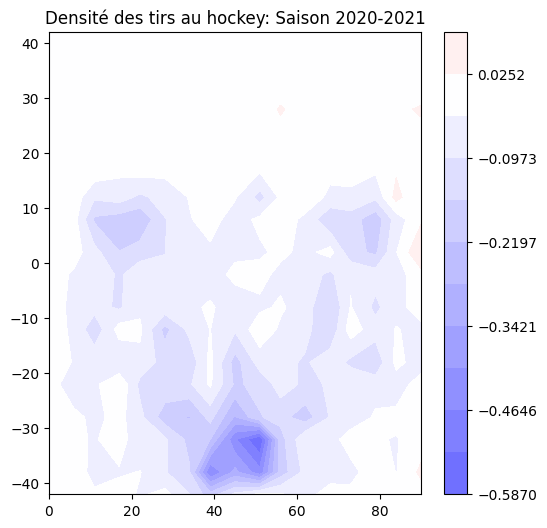

In [15]:
import matplotlib.colors as mcolors

# Charger l'image du terrain de hockey
im = plt.imread('../figures/zone_offensive.png')

fig, ax = plt.subplots(figsize=(6, 6))

width_rink = 42.5
height_rink = 90


#ax.imshow(im, extent=[0, 42.5, 100, 0])

[x,y] = np.round(np.meshgrid(np.linspace(0,90,17),np.linspace(-42.5,42.5,18)))

ax = ax.contourf(x,y,result,alpha = 1, cmap='bwr', 
        levels = np.linspace(np.min(result),np.max(result),12),
        vmin=-1,
        vmax=1,
            )


fig.colorbar(ax, orientation="vertical",pad = 0.05)
plt.title('Densité des tirs au hockey: Saison 2020-2021')
fig.savefig('/home/user/Documents/DataScience/blogpost-ift6758/assets/images/visu/avalanche_2020_2021.png')
plt.show()

# Milestone 2

In [2]:
data2 = pd.read_csv("../data/derivatives/features_train1.csv")

## Ingénierie des caractéristiques I

### Histogramme du nombre de tirs selon la distance du filet

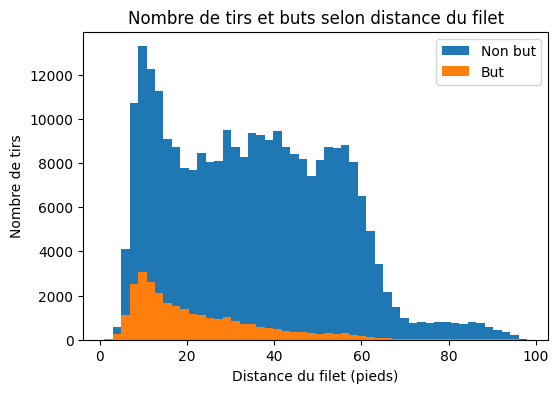

In [10]:
visualisation.hist_shots_goals_feature(data2, 'distance_goal', None, True)

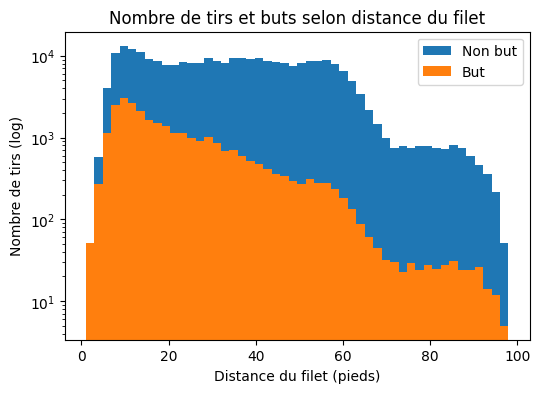

In [9]:
visualisation.hist_shots_goals_feature(data2, 'distance_goal', 'log', True)

### Histogramme du nombre de tirs selon l'angle du filet

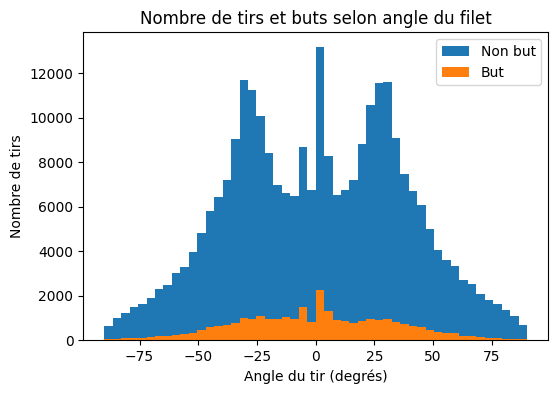

In [7]:
visualisation.hist_shots_goals_feature(data2, 'angle_goal', None, True)

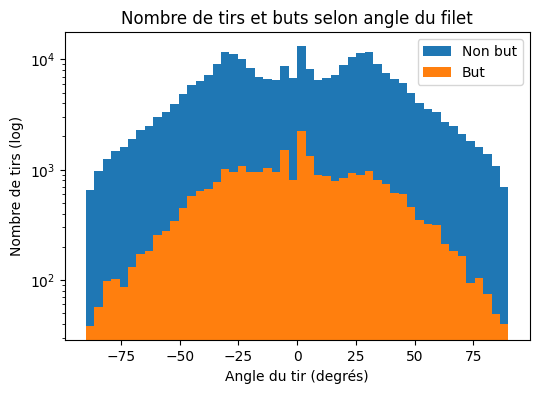

In [11]:
visualisation.hist_shots_goals_feature(data2, 'angle_goal', 'log', True)

### Histogramme 2D du nombre de tirs intégrant la distance et l'angle

<Figure size 600x400 with 0 Axes>

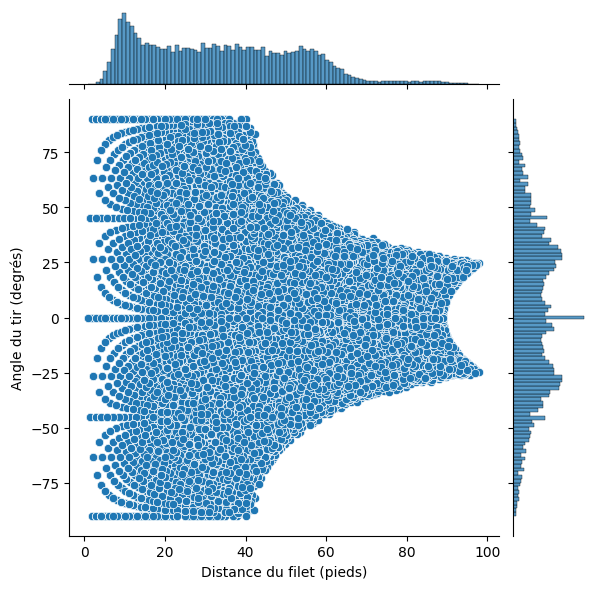

In [8]:
visualisation.hist_2d_shots(data=data2, x='distance_goal', y='angle_goal', hue=None, save=True)

### Histogramme du taux de but selon la distance du filet

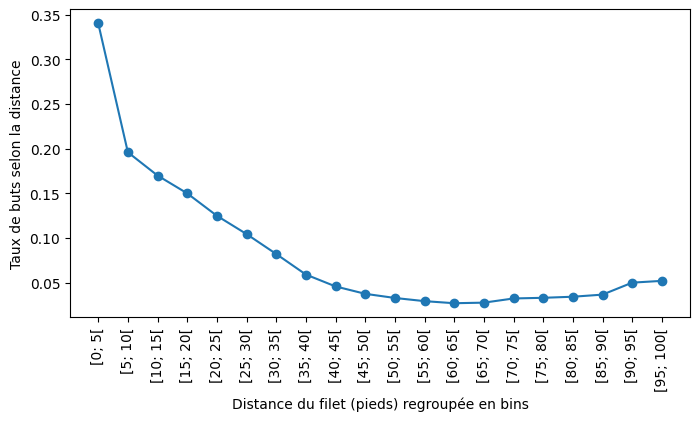

In [5]:
visualisation.goal_rate(data2, 'distance_goal', 0, 101, 5, True)

### Histogramme du taux de but selon l'angle de tir

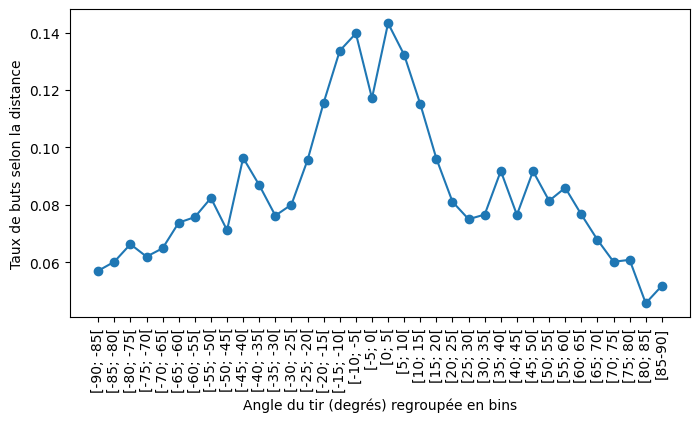

In [6]:
visualisation.goal_rate(data2, 'angle_goal', -90, 90, 5, True)